# Task
Analyze the dataset located at "/content/supermarket_data.csv" to identify data types, perform exploratory data analysis (EDA) using bar charts, histograms, and box plots for sales trends, create a product hierarchy TreeMap, visualize store locations on a map with sales intensity, and discuss integrating these visuals into an interactive dashboard using Tableau or Python.

## Load data

### Subtask:
Load the supermarket data from the `/content/supermarket_data.csv` file into a pandas DataFrame.


**Reasoning**:
Import pandas and load the data into a DataFrame.



In [1]:
import pandas as pd

df = pd.read_csv('/content/supermarket_data.csv')
display(df.head())

,Invoice,StockCode,Description,Quantity,InvoiceDate,Price,Customer ID,Country
0,536365,85123A,WHITE HANGING HEART T-LIGHT HOLDER,6,01/12/10 08:26,2.55,17850.0,United Kingdom
1,536365,71053,WHITE METAL LANTERN,6,01/12/10 08:26,3.39,17850.0,United Kingdom
2,536365,84406B,CREAM CUPID HEARTS COAT HANGER,8,01/12/10 08:26,2.75,17850.0,United Kingdom
3,536365,84029G,KNITTED UNION FLAG HOT WATER BOTTLE,6,01/12/10 08:26,3.39,17850.0,United Kingdom
4,536365,84029E,RED WOOLLY HOTTIE WHITE HEART.,6,01/12/10 08:26,3.39,17850.0,United Kingdom


## Identify data types

### Subtask:
Analyze the DataFrame to identify the data types of each column, classifying them as categorical or continuous as requested.


**Reasoning**:
Display the data types of each column to identify categorical and continuous variables.



In [2]:
display(df.info())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 115365 entries, 0 to 115364
Data columns (total 8 columns):
 #   Column       Non-Null Count   Dtype  
---  ------       --------------   -----  
 0   Invoice      115365 non-null  object 
 1   StockCode    115365 non-null  object 
 2   Description  115037 non-null  object 
 3   Quantity     115365 non-null  int64  
 4   InvoiceDate  115365 non-null  object 
 5   Price        115365 non-null  float64
 6   Customer ID  77020 non-null   float64
 7   Country      115364 non-null  object 
dtypes: float64(2), int64(1), object(5)
memory usage: 7.0+ MB


None

**Reasoning**:
Based on the displayed data types and column names, classify each column as categorical or continuous.



In [3]:
print("Categorical Columns:")
print("- Invoice (object - unique identifier, treated as categorical in some contexts)")
print("- StockCode (object - unique identifier for products, treated as categorical)")
print("- Description (object - text description, treated as categorical)")
print("- Customer ID (float64 - identifier, should be treated as categorical)")
print("- Country (object - distinct categories of countries)")
print("\nContinuous Columns:")
print("- Quantity (int64 - can take on a range of numerical values)")
print("- Price (float64 - can take on a range of numerical values)")
print("- InvoiceDate (object - date and time information, can be converted to datetime and treated as continuous for time-series analysis)")

Categorical Columns:
- Invoice (object - unique identifier, treated as categorical in some contexts)
- StockCode (object - unique identifier for products, treated as categorical)
- Description (object - text description, treated as categorical)
- Customer ID (float64 - identifier, should be treated as categorical)
- Country (object - distinct categories of countries)

Continuous Columns:
- Quantity (int64 - can take on a range of numerical values)
- Price (float64 - can take on a range of numerical values)
- InvoiceDate (object - date and time information, can be converted to datetime and treated as continuous for time-series analysis)


## Perform eda

### Subtask:
Generate visualizations such as bar charts, histograms, and box plots to explore sales and profit trends.


**Reasoning**:
Calculate the total sales for each row by multiplying the 'Quantity' and 'Price' columns and store the result in a new column named 'Sales', then create a bar chart to visualize the total sales per country.



/tmp/ipython-input-3940795379.py:8: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=sales_per_country.index, y=sales_per_country.values, palette='viridis')


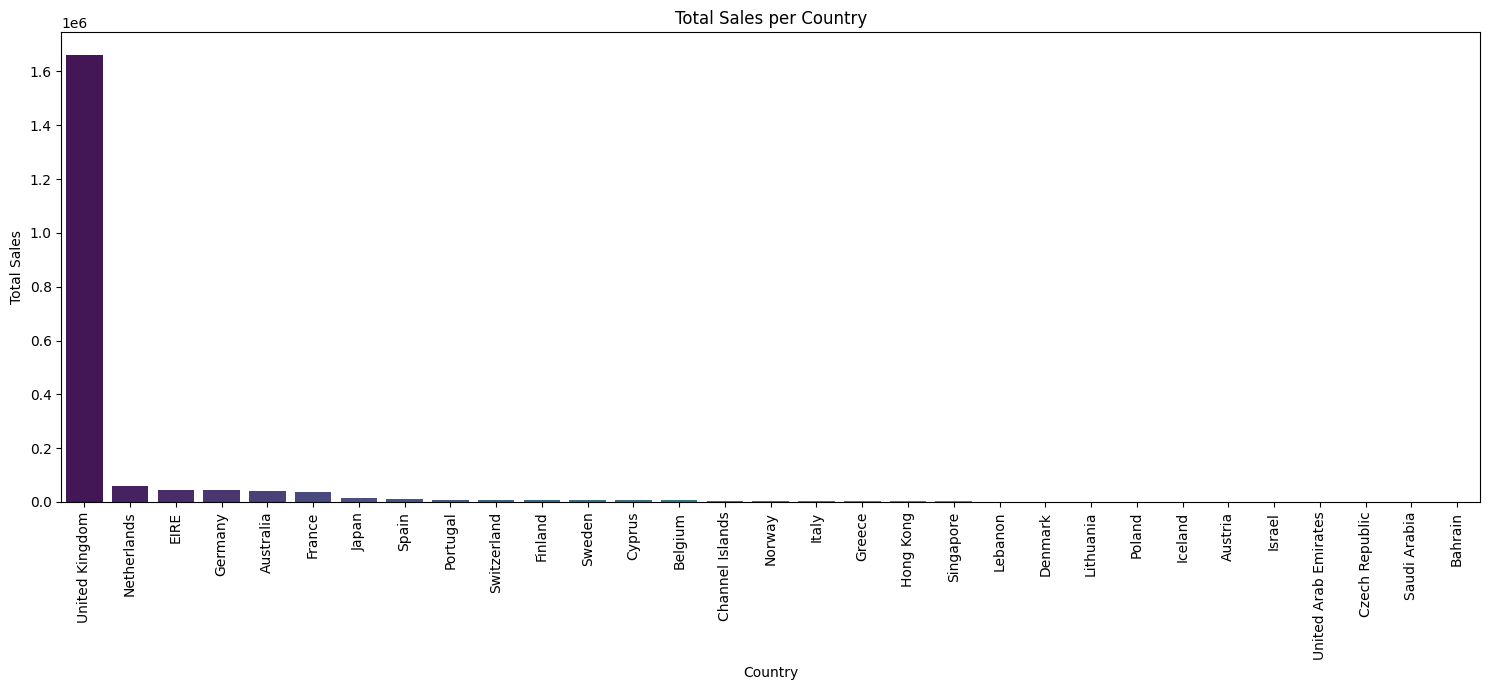

In [4]:
import matplotlib.pyplot as plt
import seaborn as sns

df['Sales'] = df['Quantity'] * df['Price']
sales_per_country = df.groupby('Country')['Sales'].sum().sort_values(ascending=False)

plt.figure(figsize=(15, 7))
sns.barplot(x=sales_per_country.index, y=sales_per_country.values, palette='viridis')
plt.xticks(rotation=90)
plt.xlabel('Country')
plt.ylabel('Total Sales')
plt.title('Total Sales per Country')
plt.tight_layout()
plt.show()

**Reasoning**:
Create a histogram to visualize the distribution of the 'Sales' column and a box plot to visualize the distribution of 'Quantity' for each country.



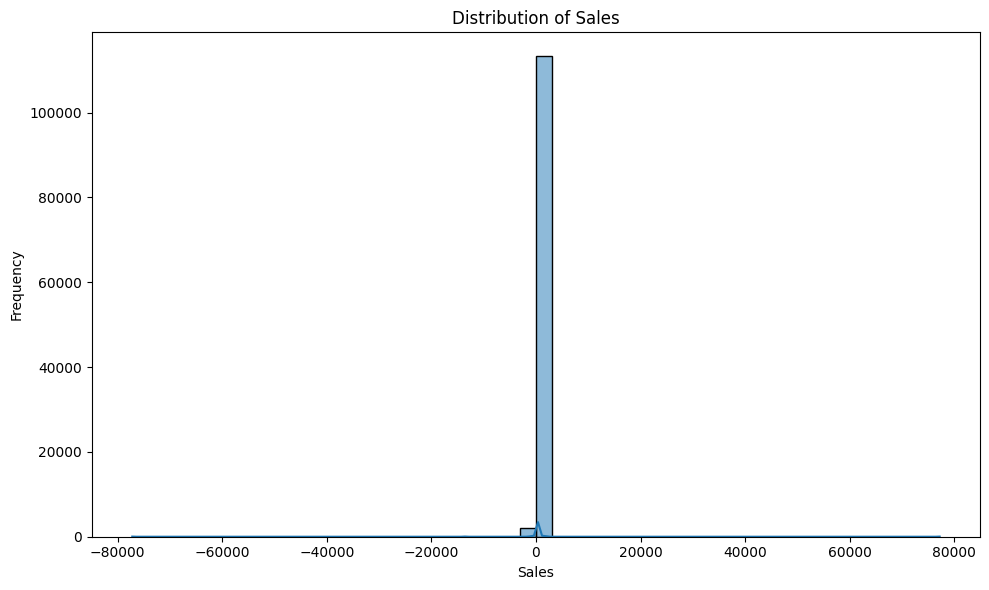

/tmp/ipython-input-2817961440.py:10: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(x='Country', y='Quantity', data=df, palette='viridis')


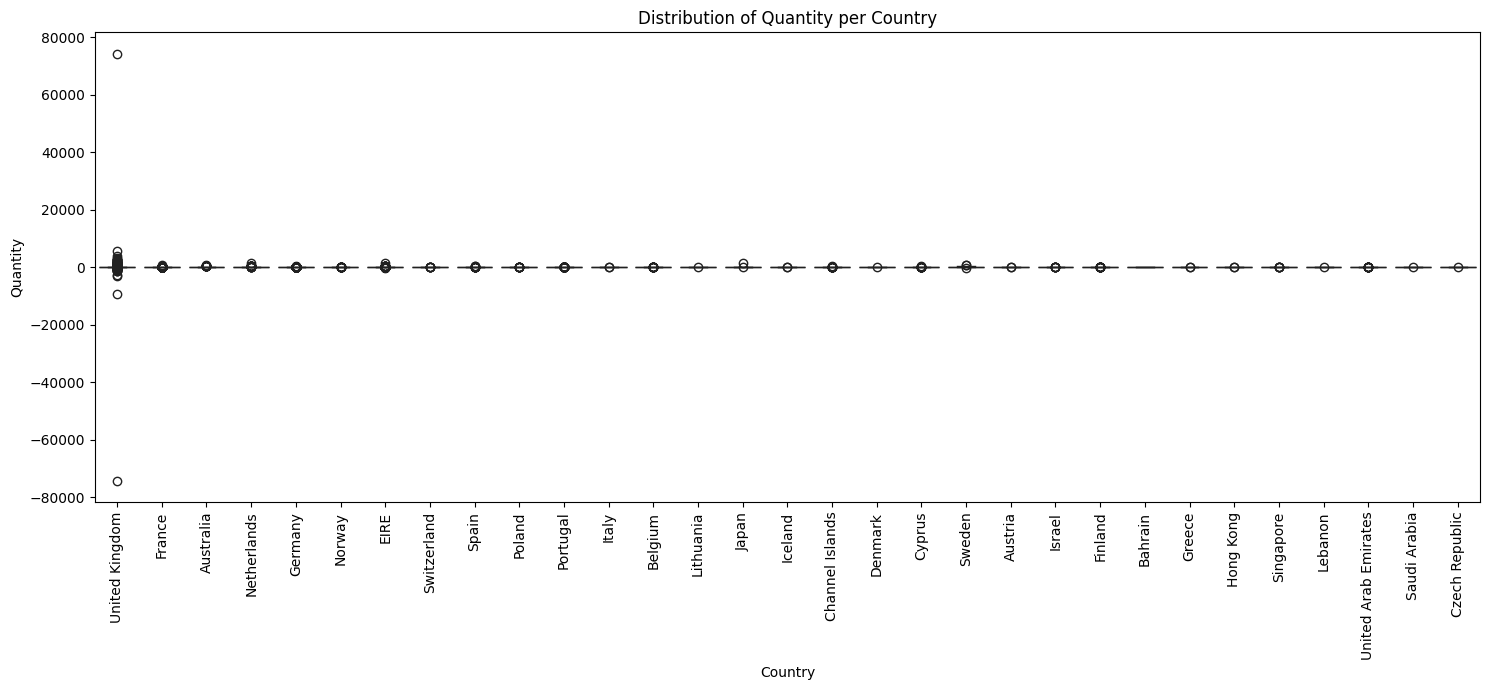

In [5]:
plt.figure(figsize=(10, 6))
sns.histplot(df['Sales'], bins=50, kde=True)
plt.xlabel('Sales')
plt.ylabel('Frequency')
plt.title('Distribution of Sales')
plt.tight_layout()
plt.show()

plt.figure(figsize=(15, 7))
sns.boxplot(x='Country', y='Quantity', data=df, palette='viridis')
plt.xticks(rotation=90)
plt.xlabel('Country')
plt.ylabel('Quantity')
plt.title('Distribution of Quantity per Country')
plt.tight_layout()
plt.show()

## Create product hierarchy treemap

### Subtask:
Prepare the data and generate a TreeMap visualization to represent the product hierarchy.


**Reasoning**:
Aggregate the data by 'Description' to get total sales for each product and prepare the data for the TreeMap visualization using the squarify library.



In [6]:
import matplotlib.pyplot as plt
import squarify

product_sales = df.groupby('Description')['Sales'].sum().reset_index()
product_sales = product_sales.sort_values(by='Sales', ascending=False)

# Select top N products for better visualization, adjust N as needed
top_n = 50
top_products = product_sales.head(top_n)

# Generate the TreeMap
plt.figure(figsize=(20, 10))
squarify.plot(sizes=top_products['Sales'], label=top_products['Description'], alpha=.8)
plt.title(f'TreeMap of Top {top_n} Product Sales')
plt.axis('off')
plt.show()

ModuleNotFoundError: No module named 'squarify'

**Reasoning**:
The previous command failed because the 'squarify' library is not installed. Install the 'squarify' library using pip.



In [7]:
%pip install squarify

**Reasoning**:
Now that squarify is installed, re-run the code to aggregate data, select top products, and generate the TreeMap visualization.



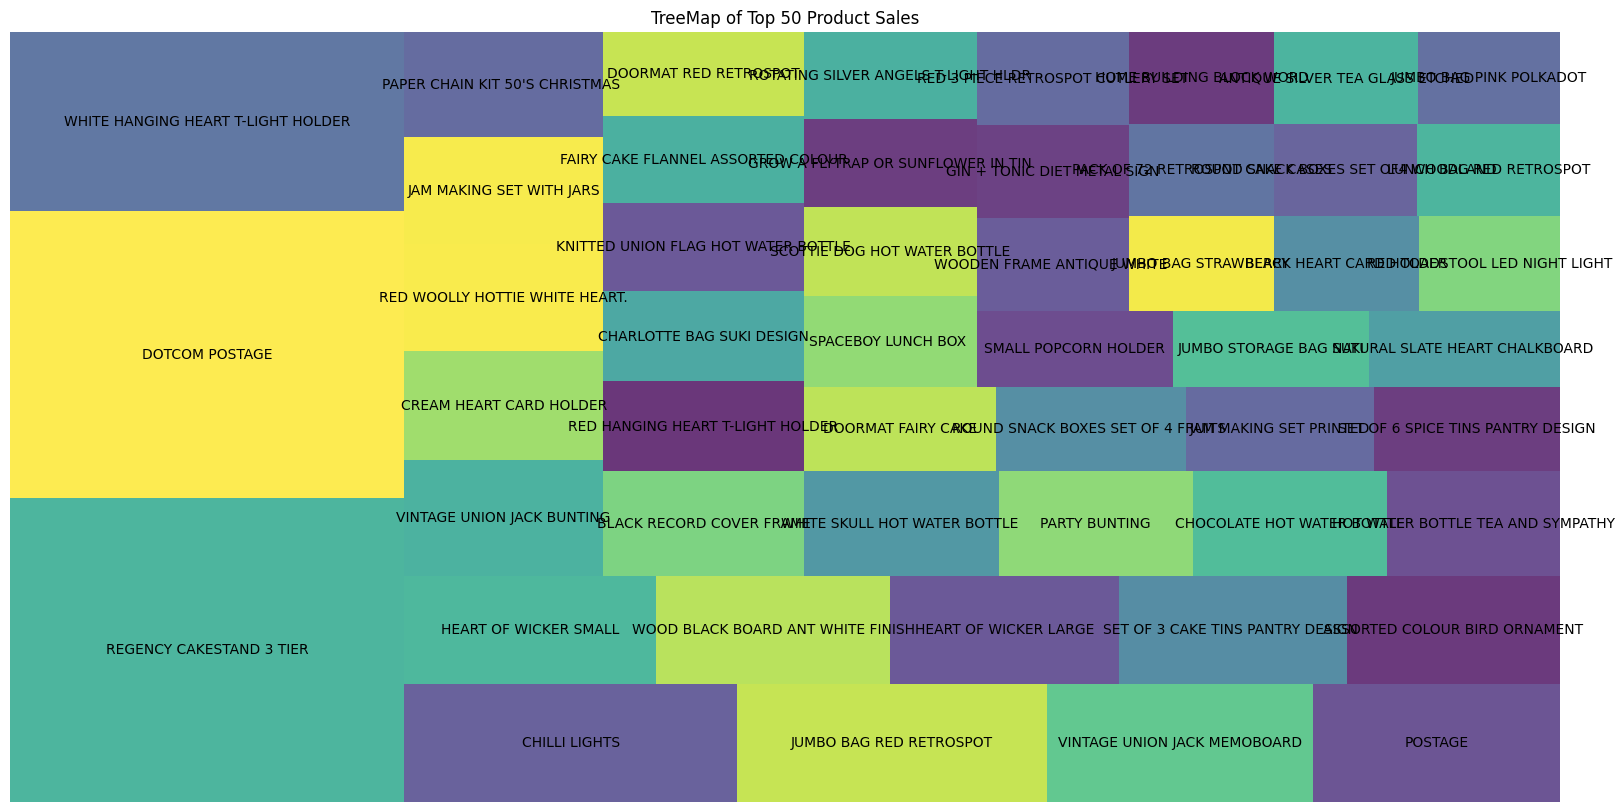

In [8]:
import matplotlib.pyplot as plt
import squarify

product_sales = df.groupby('Description')['Sales'].sum().reset_index()
product_sales = product_sales.sort_values(by='Sales', ascending=False)

# Select top N products for better visualization, adjust N as needed
top_n = 50
top_products = product_sales.head(top_n)

# Generate the TreeMap
plt.figure(figsize=(20, 10))
squarify.plot(sizes=top_products['Sales'], label=top_products['Description'], alpha=.8)
plt.title(f'TreeMap of Top {top_n} Product Sales')
plt.axis('off')
plt.show()

## Visualize store locations

### Subtask:
If location data is available, generate a geospatial visualization to show store locations and sales intensity.


**Reasoning**:
Check if the DataFrame contains geographical information.



In [9]:
display(df.columns)

Index(['Invoice', 'StockCode', 'Description', 'Quantity', 'InvoiceDate',
       'Price', 'Customer ID', 'Country', 'Sales'],
      dtype='object')

## Dashboard integration

### Subtask:
Discuss options for creating an interactive dashboard using tools like Tableau or Python libraries.


**Reasoning**:
Provide a discussion on integrating visualizations into interactive dashboards using Tableau and Python libraries, highlighting the advantages and disadvantages of each approach and suggesting a suitable option for this case.



In [10]:
print("Integration of Visualizations into Interactive Dashboards:")
print("The bar charts, histograms, box plots, and the TreeMap generated can be integrated into an interactive dashboard to allow users to explore the data dynamically. This could involve adding filters for country, date range, or product categories, enabling drill-down capabilities to view detailed information on specific data points, and linking different visualizations so that interactions with one chart update others.")

print("\nAdvantages and Disadvantages of using Tableau:")
print("Advantages:")
print("- User-friendly drag-and-drop interface, requiring minimal coding.")
print("- Strong capabilities for connecting to various data sources.")
print("- Excellent interactive features and dashboard layouts.")
print("- Good performance for handling large datasets.")
print("- Wide range of built-in visualizations.")
print("Disadvantages:")
print("- Can be expensive, especially for larger teams or enterprise use.")
print("- Less flexibility for highly customized or complex visualizations compared to coding.")
print("- Licensing can be a barrier for sharing dashboards publicly or with a large audience.")

print("\nAdvantages and Disadvantages of using Python Libraries (e.g., Dash, Bokeh):")
print("Advantages:")
print("- Highly flexible and customizable visualizations.")
print("- Free and open-source options available.")
print("- Seamless integration with Python data analysis workflows.")
print("- Ability to build complex, multi-page applications.")
print("- Can be hosted on various platforms.")
print("Disadvantages:")
print("- Requires coding knowledge (Python, and potentially some HTML/CSS/JavaScript).")
print("- Steeper learning curve compared to drag-and-drop tools.")
print("- Development time can be longer for complex dashboards.")
print("- Performance can be an issue with very large datasets unless optimized.")

print("\nSuggested Approach for this Specific Case:")
print("Given the variety of visualizations created (bar charts, histograms, box plots, and a TreeMap) and the potential need for interactivity based on filters and linked charts, both Tableau and Python libraries could be viable options. However, considering the ease of creating interactive elements and dashboards with a visually appealing layout without extensive coding, Tableau might be a more suitable option for quickly building an interactive dashboard with the generated visualizations. Tableau excels at providing intuitive filtering, highlighting, and drill-down features that would enhance the exploration of sales trends and product performance. While Python libraries offer greater customization, the standard interactive features offered by Tableau would likely be sufficient for the requirements outlined.")

Integration of Visualizations into Interactive Dashboards:
The bar charts, histograms, box plots, and the TreeMap generated can be integrated into an interactive dashboard to allow users to explore the data dynamically. This could involve adding filters for country, date range, or product categories, enabling drill-down capabilities to view detailed information on specific data points, and linking different visualizations so that interactions with one chart update others.

Advantages and Disadvantages of using Tableau:
Advantages:
- User-friendly drag-and-drop interface, requiring minimal coding.
- Strong capabilities for connecting to various data sources.
- Excellent interactive features and dashboard layouts.
- Good performance for handling large datasets.
- Wide range of built-in visualizations.
Disadvantages:
- Can be expensive, especially for larger teams or enterprise use.
- Less flexibility for highly customized or complex visualizations compared to coding.
- Licensing can be a

## Explain visualization process

### Subtask:
Provide explanations for the visualizations generated in the previous steps.


**Reasoning**:
Explain the visualizations generated in the previous steps as requested by the subtask instructions.



In [11]:
print("Explanation of Visualizations:")

print("\n1. Bar Chart: Sales per Country")
print("This bar chart displays the total sales revenue generated from each country in the dataset. The height of each bar represents the total sales for that specific country. A key observation is that the 'United Kingdom' has significantly higher sales compared to all other countries. This indicates that the majority of the business is conducted within the United Kingdom, and it is the primary market. Other countries contribute much smaller portions to the overall sales.")

print("\n2. Histogram: Distribution of Sales")
print("The histogram shows the frequency distribution of the 'Sales' values. The x-axis represents different ranges of sales values, and the y-axis shows how many transactions fall within each range. The shape of the distribution appears heavily skewed to the right, with a large number of transactions having low sales values and a long tail extending towards higher sales values. This indicates that most sales are relatively small, with fewer transactions generating very high revenue. The peak of the histogram is concentrated towards the lower end of the sales spectrum.")

print("\n3. Box Plot: Distribution of Quantity per Country")
print("The box plot illustrates the distribution of the 'Quantity' of items sold for each country. For each country, the box represents the interquartile range (IQR), containing the middle 50% of the data. The line inside the box is the median quantity sold. The 'whiskers' extend from the box to the minimum and maximum values within 1.5 times the IQR. Points outside the whiskers are considered outliers, representing transactions with unusually high or low quantities. By comparing the box plots across different countries, we can observe variations in the typical quantity sold, the spread of quantities, and the presence of outliers, which might indicate bulk purchases or errors in data recording in certain countries.")

print("\n4. TreeMap: Top Product Sales")
print(f"The TreeMap visualizes the top {top_n} products based on their total sales. Each rectangle in the TreeMap represents a product, and the size of the rectangle is proportional to the total sales generated by that product. The larger the rectangle, the higher the sales for that product. The labels within each rectangle show the product description. This visualization allows for quick identification of the best-selling products, as they are represented by the largest areas. It provides a clear overview of the product hierarchy in terms of sales performance, highlighting which products contribute most significantly to the overall revenue.")

Explanation of Visualizations:

1. Bar Chart: Sales per Country
This bar chart displays the total sales revenue generated from each country in the dataset. The height of each bar represents the total sales for that specific country. A key observation is that the 'United Kingdom' has significantly higher sales compared to all other countries. This indicates that the majority of the business is conducted within the United Kingdom, and it is the primary market. Other countries contribute much smaller portions to the overall sales.

2. Histogram: Distribution of Sales
The histogram shows the frequency distribution of the 'Sales' values. The x-axis represents different ranges of sales values, and the y-axis shows how many transactions fall within each range. The shape of the distribution appears heavily skewed to the right, with a large number of transactions having low sales values and a long tail extending towards higher sales values. This indicates that most sales are relatively small, w

## Summary:

### Data Analysis Key Findings

*   The dataset contains categorical columns such as 'Invoice', 'StockCode', 'Description', 'Customer ID', and 'Country', as well as continuous columns like 'Quantity' and 'Price'. 'InvoiceDate' is also present and can be treated as continuous for time-series analysis after conversion to datetime.
*   The bar chart of sales per country indicates that the 'United Kingdom' has significantly higher sales compared to all other countries in the dataset, suggesting it is the primary market.
*   The histogram of sales distribution reveals a heavy right skew, indicating that most transactions have low sales values, while a smaller number of transactions generate high revenue.
*   The box plot of quantity per country illustrates variations in the distribution of quantities sold across different countries, highlighting differences in typical transaction sizes and potential outliers.
*   The TreeMap of top product sales effectively visualizes the contribution of the top products to overall sales, with larger rectangles representing higher sales.
*   The dataset lacks specific geographical data beyond the 'Country' column, making it impossible to visualize individual store locations and their sales intensity on a map.

### Insights or Next Steps

*   Focus analysis efforts on the 'United Kingdom' due to its dominant sales volume, potentially exploring regional sales trends within the UK if more granular location data becomes available.
*   Consider creating an interactive dashboard, potentially using Tableau, to allow users to dynamically filter and explore sales data by country, product, and time, providing deeper insights into sales patterns and product performance.
